## 3. Download and extract data

In [1]:
# !curl -O https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [2]:
# import zipfile

# zip_ref = zipfile.ZipFile("./pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## 4. Becoming One With Data Part 1

In [3]:
!tree

Folder PATH listing for volume Temp
Volume serial number is 6803-8CA6
E:.
����pizza_steak
    ����test
    �   ����pizza
    �   ����steak
    ����train
        ����pizza
        ����steak


In [4]:
!dir pizza_steak

 Volume in drive E is Temp
 Volume Serial Number is 6803-8CA6

 Directory of e:\Projects\Git_Projects\TensorFlow_Developer_Certificate_in_2021_Zero_to_Mastery\5. Computer Vision and Convolutional Neural Networks in TensorFlow\pizza_steak

11/17/2021  06:48 PM    <DIR>          .
11/17/2021  06:48 PM    <DIR>          ..
11/17/2021  06:48 PM    <DIR>          test
11/17/2021  06:48 PM    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  57,938,448,384 bytes free


In [5]:
!dir pizza_steak\\train\\

 Volume in drive E is Temp
 Volume Serial Number is 6803-8CA6

 Directory of e:\Projects\Git_Projects\TensorFlow_Developer_Certificate_in_2021_Zero_to_Mastery\5. Computer Vision and Convolutional Neural Networks in TensorFlow\pizza_steak\train

11/17/2021  06:48 PM    <DIR>          .
11/17/2021  06:48 PM    <DIR>          ..
11/17/2021  06:48 PM    <DIR>          pizza
11/17/2021  06:48 PM    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  57,938,448,384 bytes free


In [6]:
!dir pizza_steak\\train\\pizza\\

 Volume in drive E is Temp
 Volume Serial Number is 6803-8CA6

 Directory of e:\Projects\Git_Projects\TensorFlow_Developer_Certificate_in_2021_Zero_to_Mastery\5. Computer Vision and Convolutional Neural Networks in TensorFlow\pizza_steak\train\pizza

11/17/2021  06:48 PM    <DIR>          .
11/17/2021  06:48 PM    <DIR>          ..
11/17/2021  06:48 PM            45,555 1008104.jpg
11/17/2021  06:48 PM            55,042 1008144.jpg
11/17/2021  06:48 PM            48,090 1008844.jpg
11/17/2021  06:48 PM            44,492 1008941.jpg
11/17/2021  06:48 PM           118,923 1011404.jpg
11/17/2021  06:48 PM            52,687 102037.jpg
11/17/2021  06:48 PM            47,401 1026922.jpg
11/17/2021  06:48 PM            76,126 1029698.jpg
11/17/2021  06:48 PM            57,669 1033251.jpg
11/17/2021  06:48 PM            64,285 1035854.jpg
11/17/2021  06:48 PM            35,744 1038357.jpg
11/17/2021  06:48 PM            51,637 1040878.jpg
11/17/2021  06:48 PM            48,281 1044524.jpg
11/1

In [7]:
import os

for dirpath, dirname, filenames in os.walk('.\\pizza_steak\\'):
    print(f'There are {len(dirname)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in .\pizza_steak\.
There are 2 directories and 0 images in .\pizza_steak\test.
There are 0 directories and 250 images in .\pizza_steak\test\pizza.
There are 0 directories and 250 images in .\pizza_steak\test\steak.
There are 2 directories and 0 images in .\pizza_steak\train.
There are 0 directories and 750 images in .\pizza_steak\train\pizza.
There are 0 directories and 750 images in .\pizza_steak\train\steak.


## 5. Becoming One With Data Part 2

In [8]:
import os

In [9]:
num_steak_images_train = len(os.listdir('.\\pizza_steak\\train\\steak'))
num_steak_images_train

750

In [10]:
import pathlib
import numpy as np

data_dir = pathlib.Path('.\\pizza_steak\\train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [12]:
def view_random_images(target_dir, target_class):

    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    img = mpimg.imread(target_folder + '//' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()

    print(f'image shape : {img.shape}')

    return img

['3470083.jpg']


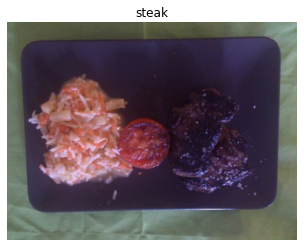

image shape : (384, 512, 3)


In [13]:
img = view_random_images(target_dir='.\\pizza_steak\\train\\', target_class='steak')

['816729.jpg']


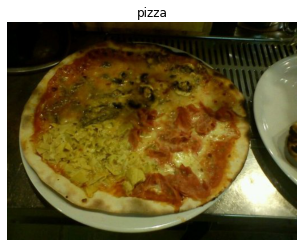

image shape : (384, 512, 3)


In [14]:
img = view_random_images(target_dir='.\\pizza_steak\\train\\', target_class='pizza')

In [15]:
img

array([[[ 0,  3,  2],
        [ 0,  2,  1],
        [ 0,  2,  1],
        ...,
        [ 3,  5,  2],
        [ 2,  4,  1],
        [ 1,  3,  0]],

       [[ 0,  3,  2],
        [ 0,  2,  1],
        [ 0,  2,  1],
        ...,
        [ 4,  6,  3],
        [ 3,  5,  2],
        [ 2,  4,  0]],

       [[ 0,  2,  1],
        [ 0,  2,  1],
        [ 0,  2,  1],
        ...,
        [ 5,  7,  4],
        [ 4,  6,  3],
        [ 3,  5,  0]],

       ...,

       [[14, 19,  0],
        [15, 20,  0],
        [15, 20,  0],
        ...,
        [16, 20,  6],
        [17, 21,  7],
        [17, 21,  7]],

       [[15, 20,  0],
        [15, 20,  0],
        [16, 21,  1],
        ...,
        [16, 20,  6],
        [17, 21,  7],
        [17, 21,  7]],

       [[16, 21,  1],
        [16, 21,  1],
        [16, 21,  1],
        ...,
        [17, 21,  7],
        [18, 22,  8],
        [18, 22,  8]]], dtype=uint8)

In [16]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 0,  3,  2],
        [ 0,  2,  1],
        [ 0,  2,  1],
        ...,
        [ 3,  5,  2],
        [ 2,  4,  1],
        [ 1,  3,  0]],

       [[ 0,  3,  2],
        [ 0,  2,  1],
        [ 0,  2,  1],
        ...,
        [ 4,  6,  3],
        [ 3,  5,  2],
        [ 2,  4,  0]],

       [[ 0,  2,  1],
        [ 0,  2,  1],
        [ 0,  2,  1],
        ...,
        [ 5,  7,  4],
        [ 4,  6,  3],
        [ 3,  5,  0]],

       ...,

       [[14, 19,  0],
        [15, 20,  0],
        [15, 20,  0],
        ...,
        [16, 20,  6],
        [17, 21,  7],
        [17, 21,  7]],

       [[15, 20,  0],
        [15, 20,  0],
        [16, 21,  1],
        ...,
        [16, 20,  6],
        [17, 21,  7],
        [17, 21,  7]],

       [[16, 21,  1],
        [16, 21,  1],
        [16, 21,  1],
        ...,
        [17, 21,  7],
        [18, 22,  8],
        [18, 22,  8]]], dtype=uint8)>

## 6. Becoming One With Data Part 3

In [18]:
img/255.

array([[[0.        , 0.01176471, 0.00784314],
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0.00784314, 0.00392157],
        ...,
        [0.01176471, 0.01960784, 0.00784314],
        [0.00784314, 0.01568627, 0.00392157],
        [0.00392157, 0.01176471, 0.        ]],

       [[0.        , 0.01176471, 0.00784314],
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0.00784314, 0.00392157],
        ...,
        [0.01568627, 0.02352941, 0.01176471],
        [0.01176471, 0.01960784, 0.00784314],
        [0.00784314, 0.01568627, 0.        ]],

       [[0.        , 0.00784314, 0.00392157],
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0.00784314, 0.00392157],
        ...,
        [0.01960784, 0.02745098, 0.01568627],
        [0.01568627, 0.02352941, 0.01176471],
        [0.01176471, 0.01960784, 0.        ]],

       ...,

       [[0.05490196, 0.0745098 , 0.        ],
        [0.05882353, 0.07843137, 0.        ],
        [0.05882353, 0